# **Training Deep Neural Networks**

Before deep diving, I clarify my understanding of Deep Learning's architecture and how, where and why they are applied.

| Category             | Examples & Notes |
|---------------------|-----------------|
| **Architectures**    | **Feedforward-based:** MLP, DNN |
|                     | **Convolutional:** CNN |
|                     | **Recurrent/Sequential:** RNN, LSTM, GRU (Used for text, speech, time series; have memory and feedback connections) |
|                     | **Attention-based:** Transformer (Used in NLP, vision, multimodal tasks; e.g., BERT, GPT) |
|                     | **Graph-based:** GNN, GAN |
| **Training algorithms** | Backpropagation |
|                     | BPTT (Backpropagation Through Time) – for RNNs |
|                     | Contrastive Divergence |
|                     | **Optimizers (used with BP):** SGD, Adam, RMSProp |
|                     | **Alternatives:** Genetic algorithms, Reinforcement Learning |



**Resources**

- **Feedforward Explained**: [YouTube Video](https://youtu.be/dgGyGY0p9jM?si=GW2FC93dgrKgFjHZ)

- **What is neural network?**: [YouTube Video](https://youtu.be/VERDOXn84dw?si=UjeeMltVOt5DkFOB)



---

# Backward Propagation

The process a neural network uses to learn from its mistakes.


1.   Make a prediction (forward pass)

      - The input goes through the network layer by layer, producing an output.

2.   Measure the error

      - The network compares its prediction with the correct answer using a loss (cost) function.

3.   Send the error backward

      - The error is passed from the output layer back to the input layer. This is why it’s called backward propagation.

4.    Compute gradients

      - For each weight, the network calculates:


> If this weight changes a little, how much will the error change?” This value is the gradient.

5.    Update the weights

      - Using Gradient Descent, each weight is adjusted slightly to reduce the error.




```python
# Import TensorFlow and Keras
from tensorflow import keras
from tensorflow.keras import layers

# Define a Sequential model
# Sequential means layers are stacked one after another
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),  # Hidden layer 1 with 64 neurons, ReLU activation, input has 10 features
    layers.Dense(64, activation='relu'),  # Hidden layer 2 with 64 neurons
    layers.Dense(1)  # Output layer with 1 neuron (for regression)
])

# Show model summary
model.summary()
```





`compile()`is where you set up backpropagation: defining loss function and optimizer.

```python
import numpy as np

# Random dataset
X_train = np.random.rand(1000, 10)  # 1000 samples, 10 features each
Y_train = np.random.rand(1000, 1)   # 1000 targets

# Compile the model
model.compile(optimizer='adam', loss='mse')  # MSE = Mean Squared Error

# Train the model
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_split=0.2)

```

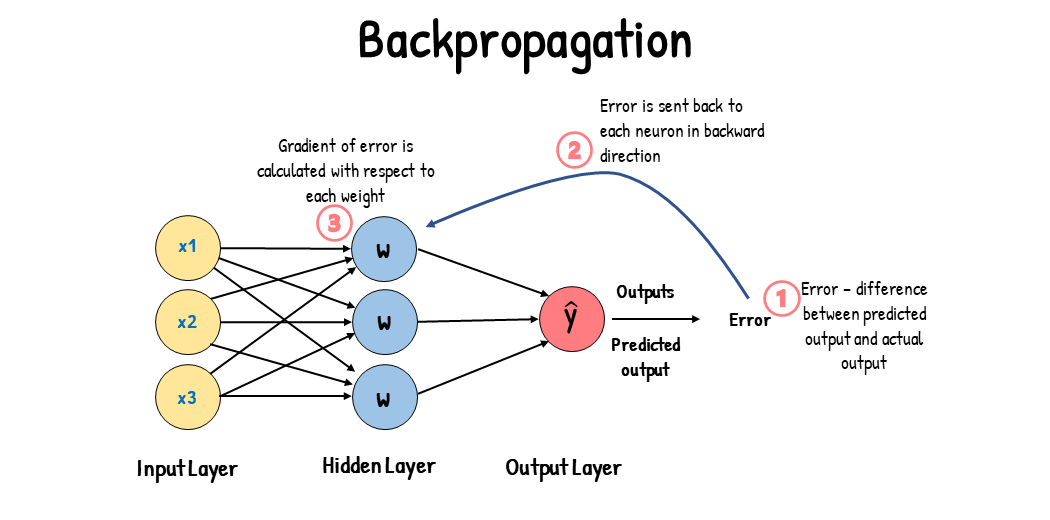

### **Problem 1 : Vanishing/Exploding(Unstable) Gradients**

## **Problem 1 : Vanishing & Exploding Gradients**

Deep neural networks often struggle with **vanishing** and **exploding gradients**, which make training difficult and unstable.


- Vanishing Gradients 📉
  - Gradients become **smaller and smaller** in lower layers  
  - Causes **very slow learning**
  - Model fails to converge ❌ to a good solution  

- Exploding Gradients 📈
  - Gradients grow **too large**  
  - Leads to **unstable training**💥and divergence  
  - Common in RNNs

- Unstable Learning
  - Different layers learn at **very different speeds**  
  - Some layers learn fast, others barely learn at all  


> These problems are especially common in **very deep networks**

```Keeping gradients stable is essential for training deep neural networks successfully.```


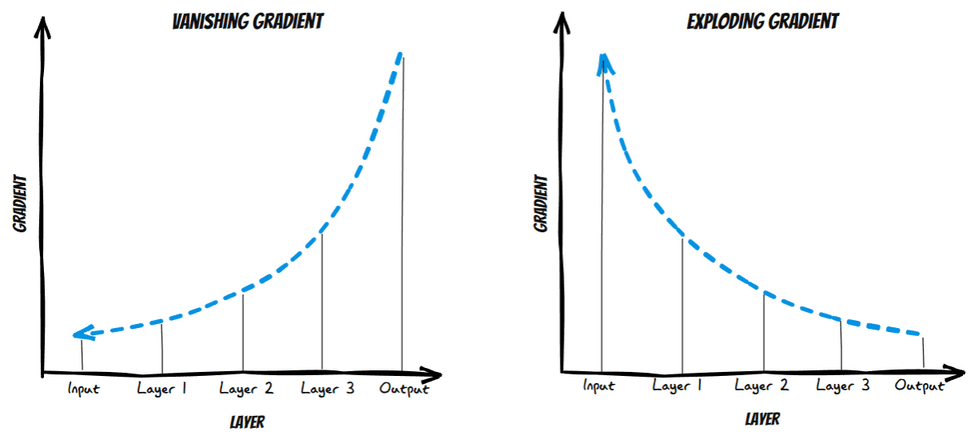

---

# Findings & Solutions

Glorot & Bengio identified key causes in 2010:

1.   Using sigmoid activation with old random normal weight initialization.
  > At the time, networks commonly used the logistic sigmoid activation and initialized weights from a normal distribution with mean 0 and standard deviation 1. This combination caused signals to be poorly scaled as they passed through layers, making gradients unstable during backpropagation.


2.   Layer output variance increases as data moves forward through the network.
  > They showed that with this setup, the variance of layer outputs grows as data moves forward through the network. Each layer amplifies the variance slightly, so deeper layers receive inputs that are either very large or very small.

3.  Activations saturate in upper layers, worsening gradient flow.
  > When inputs become too large or too small, the sigmoid function saturates (outputs close to 0 or 1).

    > In these regions, the derivative of the sigmoid is near zero, so gradients become extremely small during backpropagation. This strongly worsens the vanishing gradient problem.

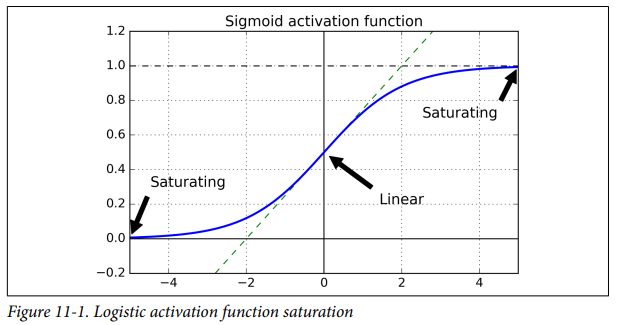

4.  Sigmoid’s mean of 0.5 (not zero) contributes to the problem; tanh works slightly better because it has zero mean.
  > The sigmoid function has an average output around 0.5, not 0.
  
    > This shifts activations in one direction, causing biased gradient updates and slower convergence.

      > The *tanh* activation performs slightly better because it is *zero-centered* (mean zero), which helps gradients flow more symmetrically and improves learning in deep networks.

## Activation Functions Comparison: Sigmoid vs Tanh vs ReLU

| Feature                    | Sigmoid 😐           | Tanh 🙂               | ReLU 🚀                  |
|----------------------------|-------------------|-------------------|-------------------------|
| **Formula**               | 1 / (1 + e^-x)     | tanh(x)           | max(0, x)               |
| **Output range**           | (0, 1)             | (-1, 1)           | [0, ∞)                  |
| **Zero-centered?**         | ❌ 0.5 mean        | ✅ 0 mean         | ❌ partially zero       |
| **Gradient issues**        | Saturates → vanishing | Saturates → less vanishing | No vanishing for x>0   |
| **Computation cost**       | Medium              | Medium            | Very low                |
| **Best for**               | Shallow networks   | Shallow / medium depth | Deep networks           |
| **Notes**                  | Biased gradients    | Better than sigmoid | Very fast training; sometimes "dead neurons" for x<0 |

---

**Key takeaway:**


- **Sigmoid** → outdated for deep networks  
- **Tanh** → better, but still limited  
- **ReLU** → standard choice for modern deep networks 🚀

> ReLU is preferred in deep networks because it avoids vanishing gradients and trains faster than sigmoid or tanh.
  - Shallow networks: sigmoid/tanh can work
  - Deep networks: ReLU (and variants like Leaky ReLU, ELU) are preferred


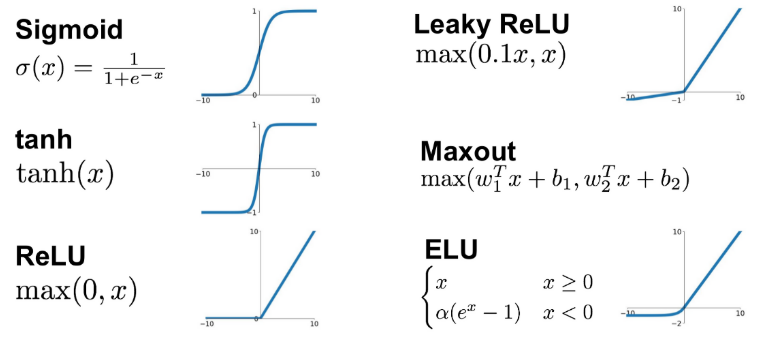